# Задание — Введение в науку о сетях и степенное право

In [1]:
from zlib import adler32
import matplotlib.pyplot as plt
from typing import List
import numpy as np
import pandas as pd
import networkx as nx
import requests

В этом задании мы рассмотрим некоторые основы networkx

In [2]:
assert nx.__version__ >= '2.5'

# Задание 1. Чтение графика из файла (0  points)

In [3]:
url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_adjlist.txt'
open('the_lord_of_the_rings_adjlist.txt', 'wb').write(requests.get(url).content)

url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_edgelist.txt'
open('the_lord_of_the_rings_edgelist.txt', 'wb').write(requests.get(url).content);

Обычным представлением графика является матрица смежности, но многие графики реального мира разрежены (много нулей в матрице смежности), поэтому в большинстве случаев данные хранятся в дешевых разреженных форматах

1.список граничных

2.элементов список смежности

Список ребер — это список пар узлов - цели и назначения ребер. Вот краткий список интерактивной сети фильмов "Властелин колец" (2001-2003).

In [4]:
with open('the_lord_of_the_rings_edgelist.txt') as f:
    print(f.read()[:197])

ARAGORN, ELROND
ARAGORN, EOMER
ARAGORN, EOWYN
ARAGORN, GIMLI
ARAGORN, LEGOLAS
ARAGORN, MERRY
ARAGORN, PIPPIN
ARAGORN, THEODEN
ARAGORN, GANDALF
ARAGORN, KING OF THE DEAD
ARWEN, ELROND
BILBO, ELROND



Список смежности - это список списков узлов, где первый узел является корневым, а другие - конечными

In [5]:
with open('the_lord_of_the_rings_adjlist.txt') as f:
    print(f.read()[:190])

FRODO, SMEAGOL, GALADRIEL, GANDALF, GORBAG
SMEAGOL, GOLLUM, SAM
GALADRIEL, GANDALF, SAM
GANDALF, GIMLI, LEGOLAS, MERRY, PIPPIN, SAM, SOLDIER, THEODEN, TREEBEARD, IORLAS
GORBAG, SAM, SHAGRAT



В большинстве случаев мы можем использовать данные функции в networkx:

nx.read_adjlist

nx.read_edgelist

nx.read_weighted_edgelist

В дальнейшем задании прочитайте графики the_lord_of_the_rings_edgelist.txt , the_lord_of_the_rings_adjlist.txt и объедините их в единый граф таким образом, чтобы одни и те же узлы были объединены в один узел, сохраняя все смежные ребра.

Подсказка: используйте graph.add_edges_from - добавить ребра 

In [6]:
def read_and_merge_graphs(edgelist_path, adjlist_path):
     # YOUR CODE HERE
    G1 = nx.read_adjlist(adjlist_path, delimiter=', ')
    G2 = nx.read_edgelist(edgelist_path, delimiter=', ')
    
    G1.add_edges_from(G2.edges)
    return G1

In [7]:
G = read_and_merge_graphs("the_lord_of_the_rings_edgelist.txt", 
                          "the_lord_of_the_rings_adjlist.txt")
assert set(G.neighbors('SAM')) == {
    'BILBO',
    'ELROND',
    'FRODO',
    'GALADRIEL',
    'GANDALF',
    'GOLLUM',
    'GORBAG',
    'SHAGRAT',
    'SMEAGOL'}
assert nx.number_of_nodes(G) == 35
assert nx.number_of_edges(G) == 98

# Задание 2. Направленные графы (0 points)

Направление ребер может быть решающей характеристикой для многих задач, например, анализа связей. Направленные ребра также известны как ссылки или дуги. В networkx тип графа определяется конструктором: nx.Graph для неориентированного графа, nx.DiGraph для ориентированного графа. Ориентированный граф может иметь асимметричную матрицу смежности.

In [8]:
diG = nx.DiGraph()
diG.add_edges_from([[0, 1], [1, 2]])
nx.to_numpy_array(diG) #Возвращает матрицу смежности графа в виде массива NumPy.

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

Напишите функцию convert_to_digraph, которая принимает неориентированный граф и возвращает новый ориентированный граф, где направление определяется правилом: узел следует до, если длина имени по крайней мере равна длине имени из . Сохраните порядок узлов и имя атрибута узла. P.S. Write a function convert_to_digraph that takes an undirected graph and returns a new directed graph where the direction is defined by the rule: the node  follows to  if the length of name of  is at least the length of name of . Keep the ordering of nodes and the node attribute name.

In [9]:
def convert_to_digraph(G):
    # YOUR CODE HERE
    graph = nx.DiGraph()
    graph.add_nodes_from(G) #добавляем узлы

    for i, j in G.edges:
        if (len(G.nodes[i]['name']) > len(G.nodes[j]['name'])):
            graph.add_edge(i, j)

        elif (len(G.nodes[i]['name']) == len(G.nodes[j]['name'])):
            graph.add_edge(i, j)
            graph.add_edge(j, i)

        else:
            graph.add_edge(j, i)

    attributes = nx.get_node_attributes(G, 'name')
    nx.set_node_attributes(graph, attributes, 'name')
    return graph

In [10]:
newG = nx.convert_node_labels_to_integers(G, label_attribute='name')
diG = convert_to_digraph(newG)
assert list(diG.nodes) == list(newG.nodes)
for i, j in diG.edges:
    assert len(diG.nodes[i]['name']) >= len(diG.nodes[j]['name'])
assert len(diG.edges) == 117

# Задача 3. Основные статистические данные (0 points)

Networkx предоставляет простой интерфейс для получения базовой статистики графика (посмотрите документацию, чтобы вспомнить определения):
nx.radius - возвращает радиус графа

nx.diameter - возвращает диаметр графа

nx.average_shortest_path_length - Возвращает среднюю длину кратчайшего пути.

nx.average_clustering - Вычислит средний коэффициент кластеризации для графа G.

Например, вот статистика графа путей с 3 узлами:

Radius:  1
Diameter:  2
Average shortest path length:  1.3333333333333333
Average clustering coefficient:  0.0


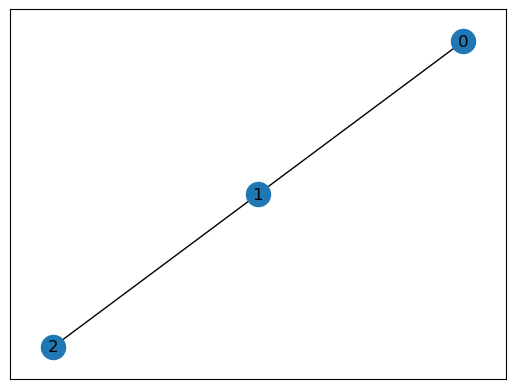

In [11]:
G = nx.path_graph(3)
print('Radius: ', nx.radius(G))
print('Diameter: ', nx.diameter(G))
print('Average shortest path length: ', nx.average_shortest_path_length(G))
print('Average clustering coefficient: ', nx.average_clustering(G))
nx.draw_networkx(G)

Ваша задача - создавать графики по заданной статистике. Мы можем создать график, используя простые интерфейсы networkx. Например, мы можем создать график, передав список ребер.

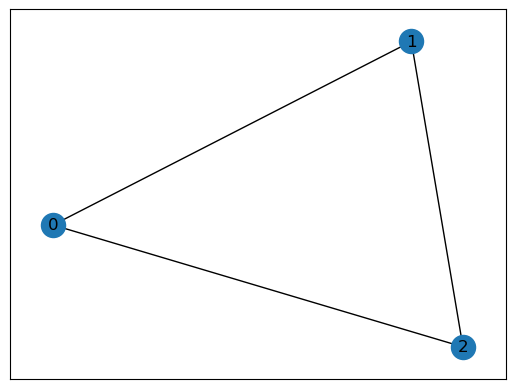

In [12]:
G = nx.Graph([[0, 1], [1, 2], [2, 0]])
nx.draw_networkx(G)

Или создайте пустой график, а затем добавляйте ребра одно за другим.

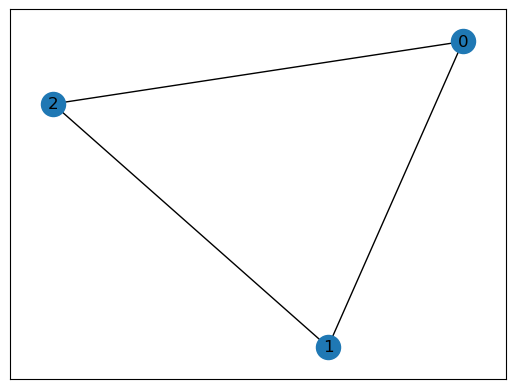

In [13]:
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 0)
nx.draw_networkx(G)

Ваша задача - создавать графики по заданной статистике.

Напишите функцию graph1, которая возвращает график с радиусом 3 и диаметром 3.

In [14]:
def graph1():
    # YOUR CODE HERE
    graph = nx.Graph()
    graph.add_edge(1, 5)
    graph.add_edge(1, 2)
    graph.add_edge(5, 4)
    graph.add_edge(4, 6)
    graph.add_edge(6, 3)
    graph.add_edge(3, 2)
    print('Radius: ', nx.radius(graph))
    print('Diameter: ', nx.diameter(graph))
    nx.draw_networkx(graph)
    return graph

Radius:  3
Diameter:  3


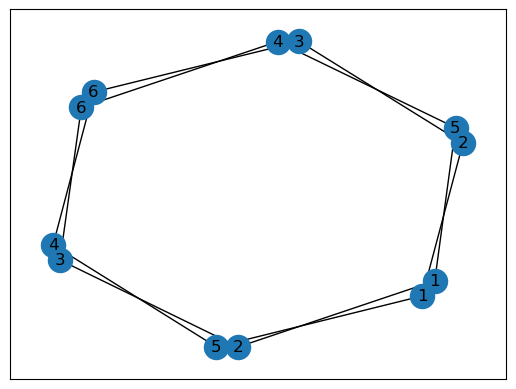

In [15]:
G = graph1()
assert nx.radius(G) == nx.diameter(G) == 3
nx.draw_networkx(G)

Напишите функцию graph2, которая возвращает график диаметром не менее 5 средних длин кратчайшего пути.

In [20]:
def graph2():
    # YOUR CODE HERE
    n = 100
    m = 10
    graph = nx.complete_graph(n+1)
    for i in range(n, n+m):
        graph.add_edge(i, i+1)
    print('Diameter: ', nx.diameter(graph))
    print('Average shortest path length: ', nx.average_shortest_path_length(graph))
    nx.draw_networkx(graph)
    return graph

Diameter:  11
Average shortest path length:  1.927927927927928


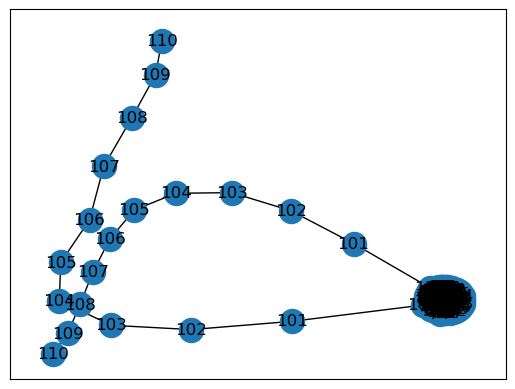

In [21]:
G = graph2()
assert nx.diameter(G) >= 5 * nx.average_shortest_path_length(G)
nx.draw_networkx(G)

Напишите функцию graph3, которая возвращает график со средним коэффициентом кластеризации от 0,1 до 0,11.

In [18]:
def graph3():
    # YOUR CODE HERE
    graph = nx.Graph()
    graph.add_edge(1, 2)
    graph.add_edge(2, 3)
    graph.add_edge(3, 4)
    graph.add_edge(4, 5)
    graph.add_edge(5, 10)
    graph.add_edge(6, 7)
    graph.add_edge(7, 8)
    graph.add_edge(8, 9)
    graph.add_edge(9, 10)
    graph.add_edge(10, 11)
    graph.add_edge(11, 12)
    graph.add_edge(12, 13)
    graph.add_edge(13, 14)
    graph.add_edge(14, 10)
    graph.add_edge(14, 15)
    graph.add_edge(15, 16)
    graph.add_edge(16, 11)
    graph.add_edge(10, 18)
    graph.add_edge(18, 9)
    graph.add_edge(20, 11)
    graph.add_edge(16, 10)
    graph.add_edge(21, 8)
    print('Average clustering coefficient: ', nx.average_clustering(graph))
    nx.draw_networkx(graph)
    return graph

Average clustering coefficient:  0.10350877192982455


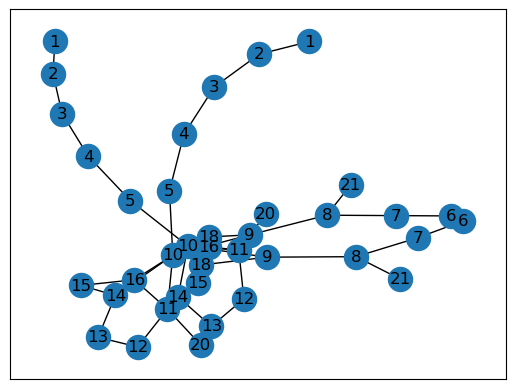

In [19]:
G = graph3()
assert 0.1 <= nx.average_clustering(G) <= 0.11
nx.draw_networkx(G)

# Задание 4. Расположение графика (0 points)

Макет графика - это словарь с расположением каждого узла: ключи - это узлы, а значения - позиции x, y. По умолчанию в nx.draw_networkx это spring layout — силовое представление сети, рассматривающее ребра как пружины, удерживающие узлы близко, в то время как узлы рассматриваются как отталкивающие объекты.

In [22]:
G = nx.barabasi_albert_graph(10, 2)
layout = nx.spring_layout(G)
layout

{0: array([-0.01063905, -0.20338898]),
 1: array([ 0.13931494, -1.        ]),
 2: array([-0.23142017, -0.08386665]),
 3: array([0.1556736 , 0.26917824]),
 4: array([0.66268834, 0.1205245 ]),
 5: array([ 0.40371629, -0.25901765]),
 6: array([-0.50563883,  0.23370264]),
 7: array([-0.56084988, -0.55549971]),
 8: array([-0.17560431,  0.51698839]),
 9: array([0.12275908, 0.96137922])}

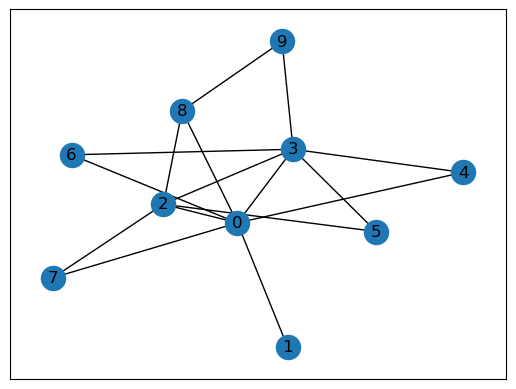

In [23]:
nx.draw_networkx(G, pos=layout)

Макет Kamada Kawai основан на функции затрат длины пути. Иногда это очень похоже на макет spring, однако существенное отличие заключается в том, что макет spring является случайным, а Kamada Kawai - детерминированным.

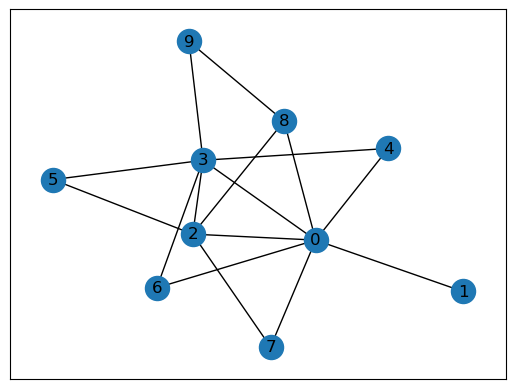

In [24]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout)

Круговая компоновка позволяет нарисовать график, узлы которого находятся в круге.

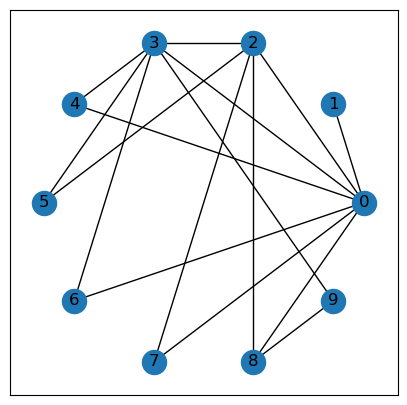

In [25]:
layout = nx.circular_layout(G)
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, pos=layout)

Двудольный макет позволяет рисовать двудольный график.

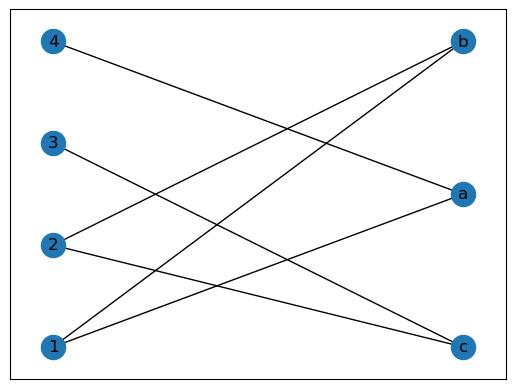

In [26]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
layout = nx.bipartite_layout(B, [1, 2, 3, 4])
nx.draw_networkx(B, pos=layout)

В networkx есть и другие макеты, также есть некоторые полезные параметры, которые вы можете найти в документации. Далее давайте визуализируем сеть совместных появлений персонажей в "Матрице" — американском научно-фантастическом боевике 1999 года, написанном и срежиссированном Вачовски. Набор данных взят из https://moviegalaxies.com /.

In [27]:
url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/the_matrix_graph.gexf'
open('the_matrix_graph.gexf', 'wb').write(requests.get(url).content);

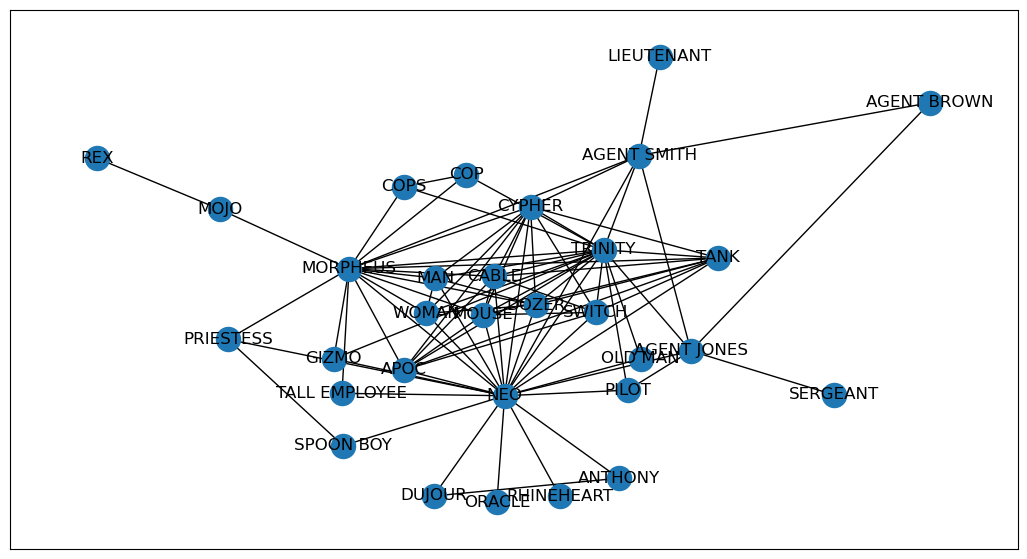

In [28]:
def get_matrix_graph():
    G = nx.read_gexf('the_matrix_graph.gexf')
    mapping = {}
    for node in G.nodes:
        mapping[node] = G.nodes[node]['label']
    G = nx.relabel_nodes(G, mapping)
    return G
matrixG = get_matrix_graph()
plt.figure(figsize=(13, 7))
layout = nx.kamada_kawai_layout(matrixG)
nx.draw_networkx(matrixG, pos=layout)

Ваша задача - нарисовать матричный график, используя макет kamada kawai с нелинейной модификацией, чтобы получить более плотный макет вдали от узла NEO. Давайте определим коэффициент близости, используя гауссово ядро
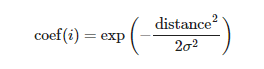

где расстояние - это евклидово расстояние от узла до узла NEO, является константой. Затем узлы должны быть перемещены к узлу NEO таким образом, чтобы
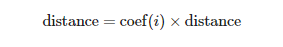

Самый простой способ сделать это - центрировать макет так, чтобы узел NEO находился в x = 0 y = 0, а затем умножить все позиции узла на коэффициент близости.

Напишите функцию dense_ne_lo_layout, которая принимает макет, sigma и возвращает новый (плотный) макет.
Подсказка: используйте np.linalg.norm для вычисления евклидовой нормы.

In [43]:
def dense_neo_layout(layout, sigma):
    # YOUR CODE HERE
    new_layout = {}
    for node in layout:
        new_layout[node] = layout[node] - layout['NEO']
        distance = np.linalg.norm(new_layout[node])
        coef = np.exp(-distance**2 / (2 * sigma**2))
        new_layout[node] = coef * new_layout[node]
    return new_layout

In [44]:
layout = nx.kamada_kawai_layout(matrixG)
layout = dense_neo_layout(layout, sigma=1.5)
assert type(layout) == dict
assert np.all(layout['NEO'] == [0, 0])
assert np.all(layout['REX'].round(2) == [-0.67,  0.58])
assert adler32(str(layout['AGENT BROWN'].round(2)[0]).encode()) == 32309448

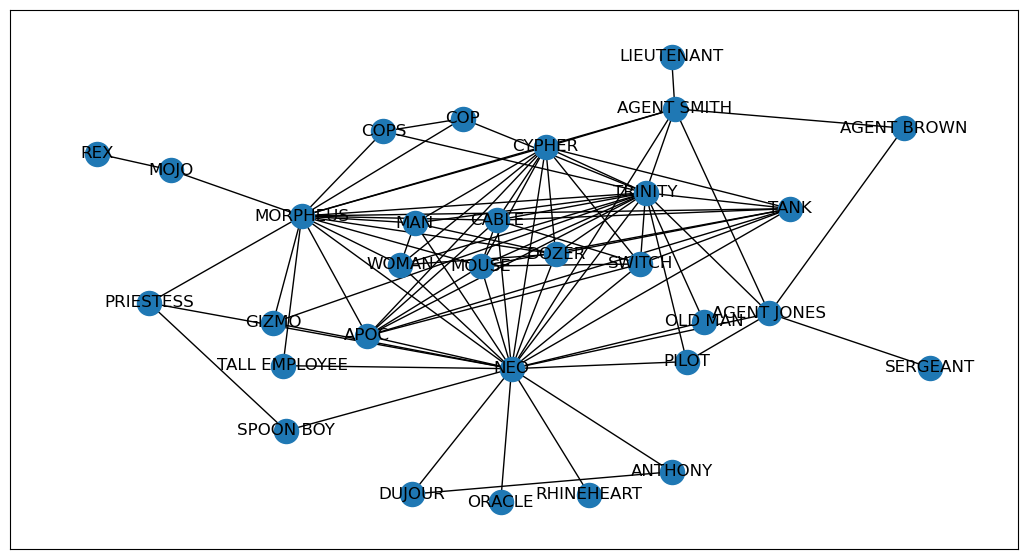

In [45]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(matrixG, layout)

# Задание 5. Визуализация узлов (2 points)

Мы можем установить размер узла с помощью draw_networkx с параметром node_size. Это должен быть список значений, упорядоченных по G.узлам. Например, рассмотрим простой граф путей.

In [53]:
G = nx.path_graph(3)
G.nodes

NodeView((0, 1, 2))

Давайте установим размер 200 для узла 0, 300 для 1, 400 для 2.

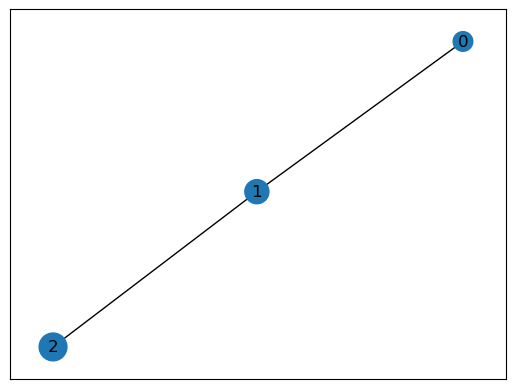

In [54]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout, node_size=[200, 300, 400])

Чтобы раскрасить узлы, мы можем использовать node_color. Это должен быть список цветов:

кортеж значений float RGB 0-1: (красный, зеленый, синий)

кортеж значений float RGBA 0-1: (красный, зеленый, синий, альфа)

имя цвета строки

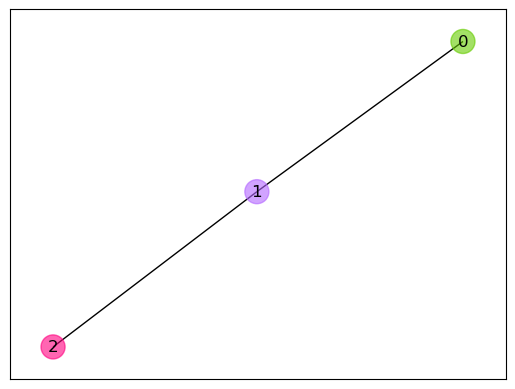

In [55]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[(0.4, 0.8, 0, 0.6), (0.7, 0.4, 1, 0.6), (1, 0, 0.5, 0.6)])

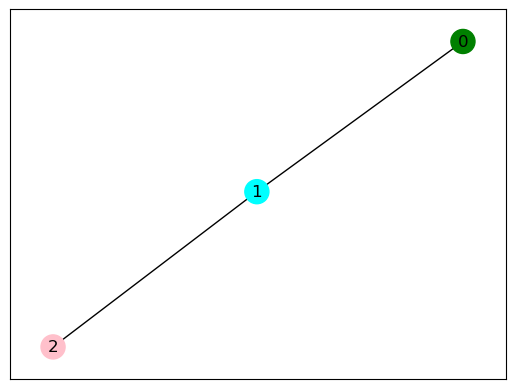

In [56]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=['green', 'cyan', 'pink'])

Также мы можем использовать цвета из matplotlib colormaps. Раздельный:

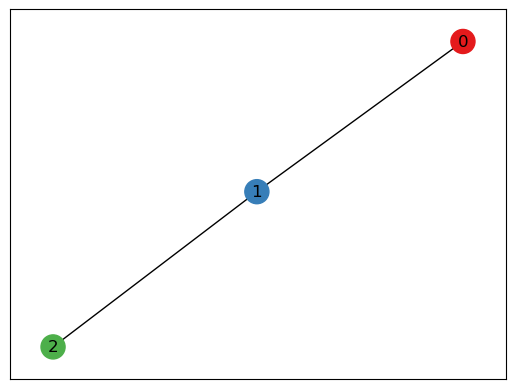

In [57]:
colors = plt.cm.Set1.colors
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[colors[0], colors[1], colors[2]])

Или непрерывный:

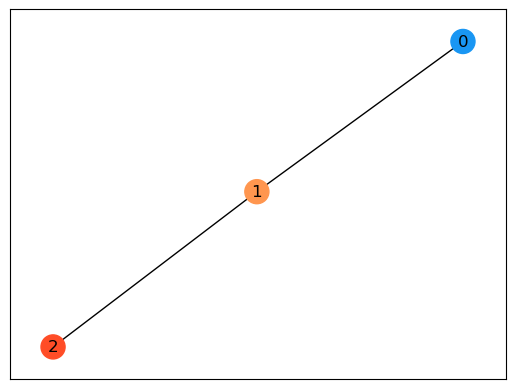

In [58]:
rainbow = plt.cm.rainbow
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[rainbow(0.2), rainbow(0.8), rainbow(0.9)])

Другой вариант раскрашивания узлов - передать список отдельных значений с помощью node_color и colormap с помощью параметра cmap. В этом случае наименьшее значение будет присвоено первому цвету в цветовой карте и наоборот.

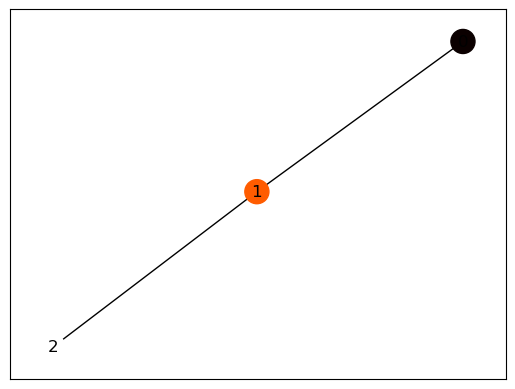

In [59]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3])

Мы можем принудительно установить цветовой диапазон, используя vmin и vmax.

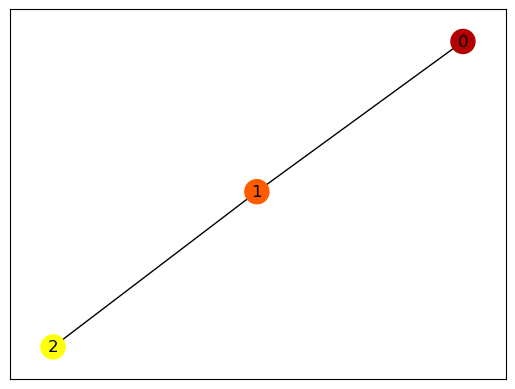

In [60]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3],
    vmin=0, vmax=4)

Мы можем граничить с узлами, используя параметры edgecolors и linewidths.

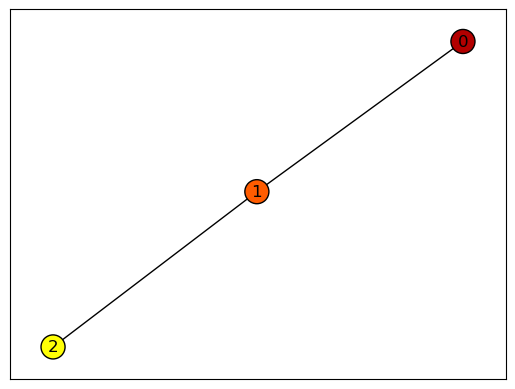

In [61]:
nx.draw_networkx(
    G=G, 
    pos=layout,
    cmap = plt.cm.hot, 
    node_color=[1, 2, 3],
    vmin=0, vmax=4, 
    edgecolors='black', 
    linewidths=1)

Ваша задача состоит в том, чтобы настроить размер и цвет узлов в матричном графике, размер и цвет берутся из степени узла и атрибута узла G.nodes[узел].

In [62]:
matrixG.nodes['NEO']

{'movie_id': 543,
 'Eccentricity': 3.0,
 'Closeness Centrality': 1.2666666666666666,
 'Betweenness Centrality': 197.97857142857137,
 'Degree': 23,
 'Component ID': 0,
 'Modularity Class': 2,
 'viz': {'color': {'r': 95, 'g': 202, 'b': 190, 'a': 1.0},
  'size': 20.0,
  'position': {'x': -22.198978, 'y': -24.325882, 'z': 0.0}},
 'label': 'NEO'}

Напишите функцию drawing_nodes_params, которая принимает график и возвращает словарь с параметрами для nx.draw_networkx вида {'G': graph, 'node_color': color, ...}. Параметры должны содержать график, макет kamada kawai, цвета узлов, а именно атрибут color. Цвета должны быть преобразованы из диапазона RGB 0-255 в диапазон RGB 0-1. Размер узла - это степень узла G.степень [узла], умноженная на 100.

In [32]:
def drawing_nodes_params(graph):
    # YOUR CODE HERE
    params = {}
    params['G'] = graph
    params['pos'] = nx.kamada_kawai_layout(graph)
    params['node_color'] = []
    params['node_size'] = []
    for node in graph.nodes:
        color = graph.nodes[node]['viz']['color']
        rgb = np.array([color['r'], color['g'], color['b']]) / 255
        params['node_color'].append(rgb)
        params['node_size'].append(graph.degree[node] * 100)
    return params

In [33]:
matrixG = get_matrix_graph()
params = drawing_nodes_params(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 200
assert params['node_size'][1] == 600
assert nx.to_numpy_array(params['G']).sum() == 326.0

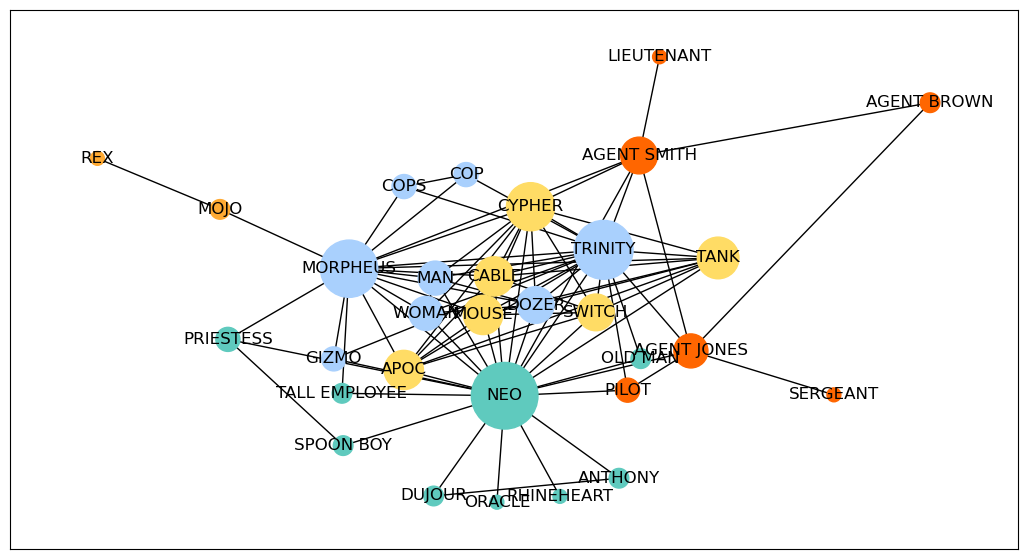

In [34]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

Иногда бывает полезно рисовать узлы в нелинейном масштабе. Если мы хотим сделать размеры узлов более сопоставимыми, мы можем использовать полиномиальную или экспоненциальную шкалу. С другой стороны, мы можем использовать логарифмическую шкалу, чтобы сделать размеры более похожими.

Напишите функцию drawing_nodes_polyparams, которая возвращает тот же словарь, что и функция drawing_nodes_params, но размер узла равен сумме степеней узла в степени 3 и 10.
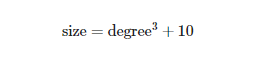

In [37]:
def drawing_nodes_polyparams(graph):
    # YOUR CODE HERE
    params = {}
    params['G'] = graph
    params['pos'] = nx.kamada_kawai_layout(graph)
    params['node_color'] = []
    params['node_size'] = []
    for node in graph.nodes:
        color = graph.nodes[node]['viz']['color']
        rgb = np.array([color['r'], color['g'], color['b']]) / 255
        params['node_color'].append(rgb)
        params['node_size'].append(graph.degree[node]**3 + 10)
    return params

In [38]:
matrixG = get_matrix_graph()
params = drawing_nodes_polyparams(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 18
assert params['node_size'][1] == 226
assert nx.to_numpy_array(params['G']).sum() == 326.0

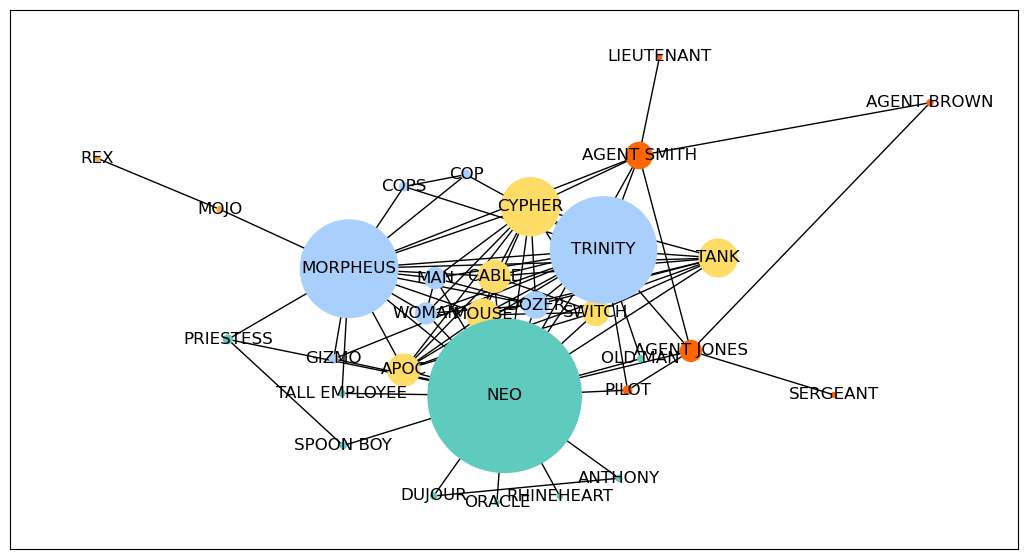

In [39]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

# Задача 6. Распределение степеней (2 points)

В этой задаче мы попытаемся угадать график по его распределению степеней.

График A описывается гистограммой [0, 2, 10] — 0 узлов со степенью 0, 2 узла со степенью 1, 10 узлов со степенью 2.

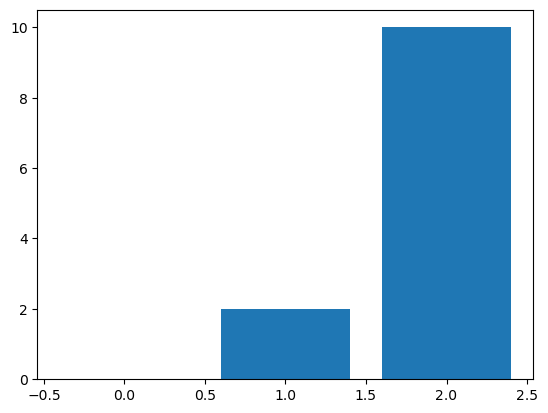

In [8]:
dens_a = [0, 2, 10]
plt.bar(range(len(dens_a)), dens_a);

In [9]:
def generate_graph_a() -> nx.Graph:
    # YOUR CODE HERE
    graph = nx.Graph()
    graph.add_edge(0, 1)
    graph.add_edge(1, 2)
    graph.add_edge(2, 3)
    graph.add_edge(3, 4)
    graph.add_edge(4, 5)
    graph.add_edge(5, 6)
    graph.add_edge(6, 7)
    graph.add_edge(7, 8)
    graph.add_edge(8, 9)
    graph.add_edge(9, 10)
    graph.add_edge(10, 11)
    nx.draw_networkx(graph)
    return graph

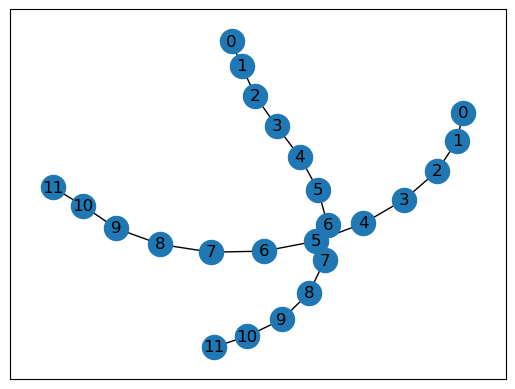

In [10]:
G = generate_graph_a()
assert nx.degree_histogram(G) == dens_a
assert nx.is_connected(G)
nx.draw_networkx(G)

Graph B

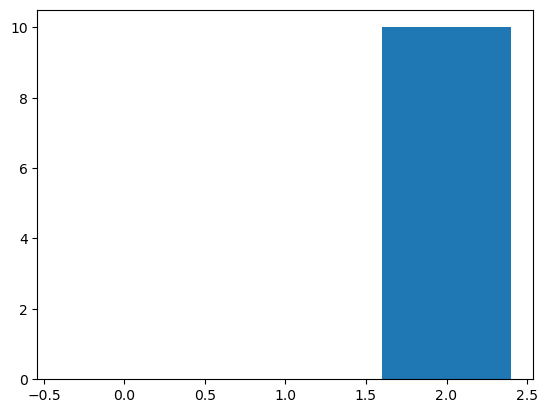

In [11]:
dens_b = [0, 0, 10]
plt.bar(range(len(dens_b)), dens_b);

In [12]:
def generate_graph_b() -> nx.Graph:
    # YOUR CODE HERE
    graph = nx.Graph()
    graph.add_edge(1, 2)
    graph.add_edge(2, 3)
    graph.add_edge(3, 4)
    graph.add_edge(4, 5)
    graph.add_edge(5, 6)
    graph.add_edge(6, 7)
    graph.add_edge(7, 8)
    graph.add_edge(8, 9)
    graph.add_edge(9, 10)
    graph.add_edge(10, 1)
    nx.draw_networkx(graph)
    return graph

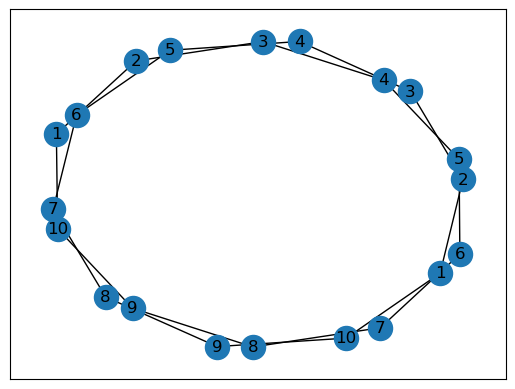

In [13]:
G = generate_graph_b()
assert nx.degree_histogram(G) == dens_b
assert nx.is_connected(G)
nx.draw_networkx(G)

Graph C

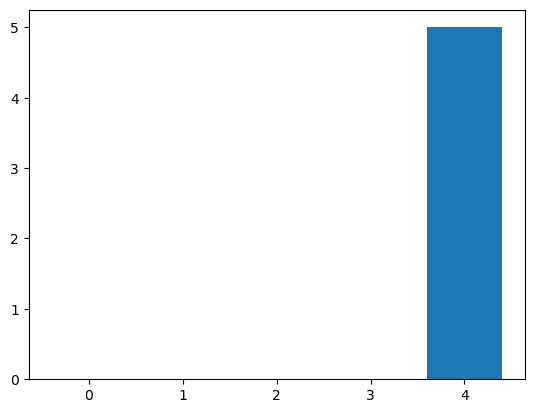

In [14]:
dens_c = [0, 0, 0, 0, 5]
plt.bar(range(len(dens_c)), dens_c);

In [15]:
def generate_graph_c() -> nx.Graph:
    # YOUR CODE HERE
    graph = nx.complete_graph(5)
    nx.draw_networkx(graph)
    return graph

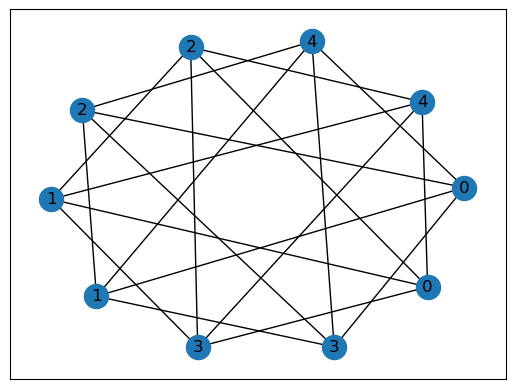

In [16]:
G = generate_graph_c()
assert nx.degree_histogram(G) == dens_c
assert nx.is_connected(G)
nx.draw_networkx(G)

Graph D

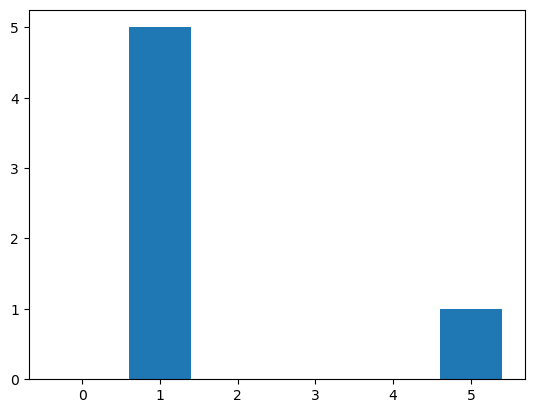

In [17]:
dens_d = [0, 5, 0, 0, 0, 1]
plt.bar(range(len(dens_d)), dens_d);

In [18]:
def generate_graph_d() -> nx.Graph:
    # YOUR CODE HERE
    graph = nx.Graph()
    graph.add_edge(6, 1)
    graph.add_edge(6, 2)
    graph.add_edge(6, 3)
    graph.add_edge(6, 4)
    graph.add_edge(6, 5)
    nx.draw_networkx(graph)
    return graph

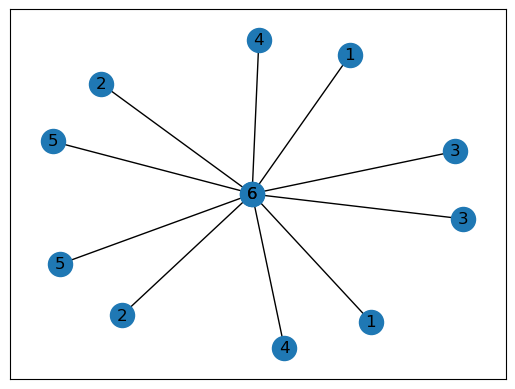

In [19]:
G = generate_graph_d()
assert nx.degree_histogram(G) == dens_d
assert nx.is_connected(G)
nx.draw_networkx(G)

# Задача 7. Степенной закон CDF (2 points)

Сеть без масштабирования имеет распределение степеней по степенному закону. Давайте подробнее рассмотрим это распределение. Основой степенного закона является
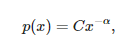

где С - константа нормализации
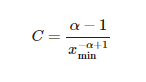

и a > 1 называется показателем распределения.

In [2]:
def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

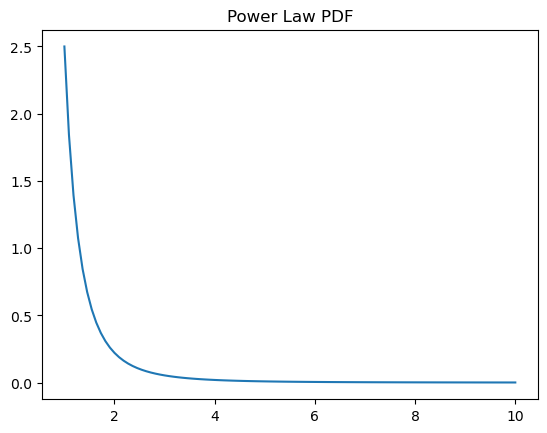

In [3]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_pdf(x_space))
plt.title('Power Law PDF');

Давайте сгенерируем наблюдения из степенного закона RV. Первым шагом является получение CDF закона Пауэла: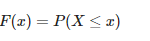

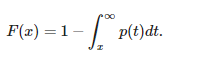

Возьмите интеграл, выведите CDF аналитически, а затем напишите функцию power_law_cdf с параметрами x, alpha и x_min.

In [4]:
def power_law_cdf(x, alpha=3.5, x_min=1): 
    # YOUR CODE HERE 
    C = (alpha - 1) / x_min ** (1 - alpha) 
    #p_x = C * x ** (-alpha) 
    F_x = 1 - C *(-(x**(1-alpha))/(1-alpha)) 
    return F_x

In [5]:
assert power_law_cdf(2, 2, 1) == 0.5
assert power_law_cdf(10, 2, 1) == 0.9
assert adler32(str(power_law_cdf(2, 3, 1)).encode()) == 32571595

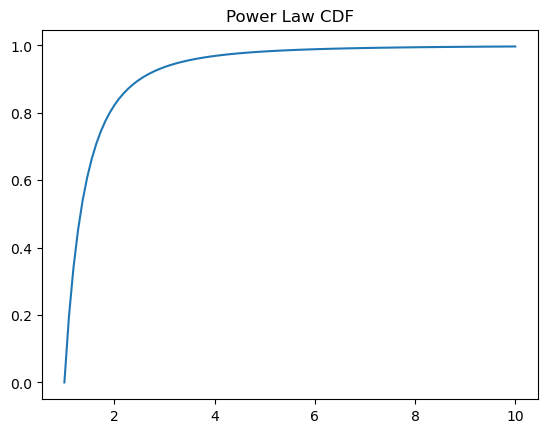

In [6]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_cdf(x_space))
plt.title('Power Law CDF');

# Задача 8. Степенной закон PPF (2 points)

Позволь . Далее определите случайную величину R, s.t. 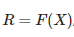 , R которая будет равномерно распределена на интервале [0, 1] (доказательство). Хорошо здесь то, что мы легко можем генерировать равномерно распределенные псевдослучайные числа, а затем преобразовывать их в степенной закон. Давайте найдем выражение для 
, где r - наблюдение из равномерного распределения на интервале [0, 1].

Найдите аналитическую форму 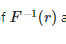
и запишите функцию power_law_ppf (функция процентной точки, также известная как квантиль) с параметрами r, alpha и x_min.

In [7]:
from scipy.stats import powerlaw
def power_law_ppf(r, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    #F = powerlaw.ppf(r, alpha, x_min)
    x = (1 - r)**(-1.0/(alpha - 1)) * x_min
    return x

In [8]:
assert round(power_law_ppf(0.5, 2, 1), 2) == 2
assert round(power_law_ppf(0.9, 2, 1), 2) == 10
assert adler32(str(round(power_law_ppf(0.96, 3, 1), 2)).encode()) == 19792020

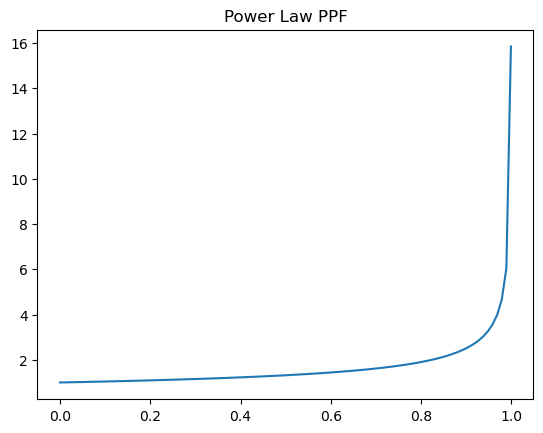

In [9]:
x_space = np.linspace(0, 0.999, 100)
plt.plot(x_space, power_law_ppf(x_space))
plt.title('Power Law PPF');

Наконец, мы можем сгенерировать наблюдение из степенного распределения следующим образом:

Генерировать наблюдение из равномерного распределения на интервале [0, 1]

Вычислите значение PPF для данного наблюдения

In [10]:
def power_law_generate(n, alpha=3.5, x_min=1, random_seed=1):
    np.random.seed(random_seed)
    uni_sample = np.random.uniform(0, 0.999, n)
    return power_law_ppf(uni_sample, alpha, x_min)

Посмотрите на гистограмму сгенерированного образца

In [11]:
alpha = 3.5
x_min = 1
x_train = power_law_generate(1000, alpha, x_min)
x_space = np.linspace(1, 15, 100)

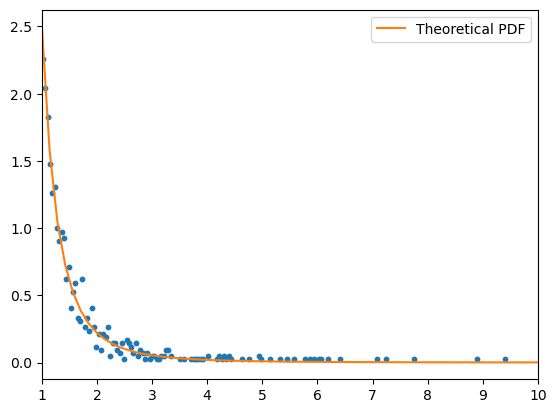

In [12]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xlim(1, 10)
plt.show()

А вот та же гистограмма в логарифмическом масштабе

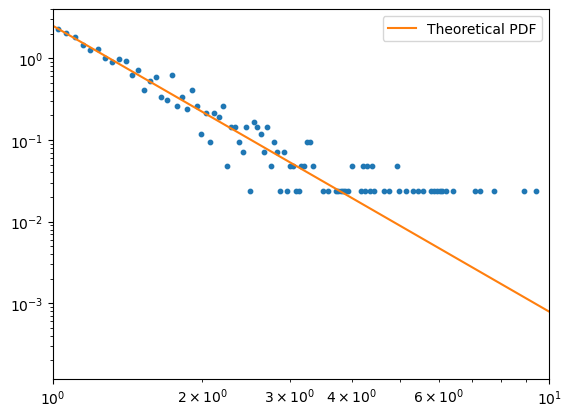

In [13]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 10)
plt.show()

# Задача 9. Оценка альфа-сигнала с линейным биннингом(2 points) 

Учитывая наблюдения из степенного закона распределения, попробуйте оценить a. Самый простой способ - нарисовать эмпирический PDF-файл с линейной привязкой в логарифмическом масштабе и применить линейную регрессию. Под линейным объединением мы подразумеваем сохранение фиксированной ширины ячейки.

Напишите функцию alpha_lin_bins, которая принимает набор поездов, количество линейных ячеек и возвращает оценочное значение a.

Подсказки:

Возьмите бревно с обеих сторон 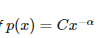

_ Для вычисления эмпирического PDF-файла используйте np.histogram(x_train, bins=ячейки, плотность=True)_

Чтобы вычислить матрицу псевдоинверсии, используйте np.linalg.pinv

Также вы можете использовать fit-predict в sklearn.linear.Линейная регрессия

In [14]:
from sklearn.linear_model import LinearRegression 

def alpha_lin_bins(x_train, bins): 
    histogram = np.histogram(x_train, bins) 
    density = histogram[0][np.where(histogram[0] != 0)] 
    density = np.log(density / len(x_train)) 
    bin_centres = np.log((histogram[1][1:] + histogram[1][:-1]) / 2) 
    bin_centres = bin_centres[np.where(histogram[0] != 0)] 
    bin_centres = bin_centres.reshape(-1, 1) 
    regression = LinearRegression() 
    regression.fit(bin_centres, density) 
    return abs(regression.coef_[-1]) 

In [15]:
bins = 100
x_train = power_law_generate(1000, x_min=1, alpha=2)
assert np.abs(alpha_lin_bins(x_train, bins) - 2) < 0.7
x_train = power_law_generate(1000, x_min=1, alpha=3.5)
assert np.abs(alpha_lin_bins(x_train, bins) - 3.5) < 0.9
x_train = power_law_generate(1000, x_min=1, alpha=10)
assert np.abs(alpha_lin_bins(x_train, bins) - 10) < 2

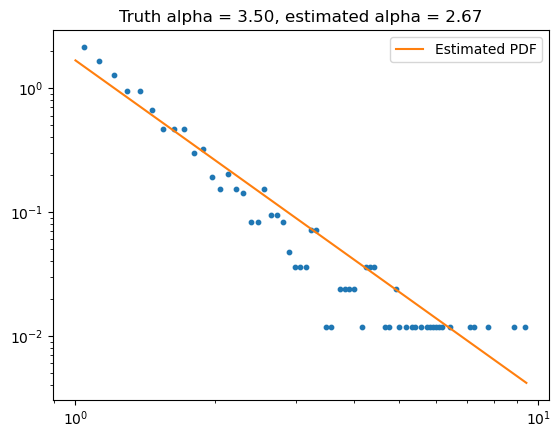

In [16]:
x_min = 1
alpha = 3.5
bins = 100

x_train = power_law_generate(1000, alpha, x_min)
hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alpha_lin_bins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, x_min), 
         label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Truth alpha = {:.2f}, estimated alpha = {:.2f}'.format(alpha, hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.show()